# Registering a dataset that will exist in the future

In [15]:
# Before we start delete anything from the databrowser with futures
! /home/b/b380001/freva/sbin/data-crawler solr del --facet dataset future -s regiklim-dev.dkrz.de:8983 -c /work/ch1187/clint/freva-dev/freva/

## Here we use a freva plugin run that has been applied

In [17]:
import freva
import xarray as xr
hist_id = 3085 # We can get this ID using the freva.history command
_ = freva.register_future_from_history_id(hist_id)

## Let's search for the data

In [18]:
list(freva.databrowser(variable="tx90petccdi"))

['future:///scratch/b/b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5/cmip5/output1/mpi-m/mpi-esm-lr/historical/yr/atmos/1day/r1i1p1/tx90pETCCDI/tx90pETCCDI_1day_mpi-esm-lr_historical_r1i1p1_199007020000-199207011200']

## The  data doesn't exist yet, but can be created on demand:

In [19]:
dset = xr.open_mfdataset(
    freva.databrowser(variable="tx90petccdi", 
                      execute_future=True
    )
)
dset

Output()

<xarray.Dataset>
Dimensions:      (time: 3, lon: 192, lat: 96, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 1990-07-02 1991-07-02 1992-07-01T12:00:00
  * lon          (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat          (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) float64 dask.array<chunksize=(3, 2), meta=np.ndarray>
    tx90pETCCDI  (time, lat, lon) float32 dask.array<chunksize=(3, 96, 192), meta=np.ndarray>
Attributes: (12/13)
    CDI:                      Climate Data Interface version 2.0.5 (https://m...
    Conventions:              CF-1.4
    institution:              Max Planck Institute for Meteorology
    ETCCDI_institution:       UNSW Australia & FUB Berlin
    ETCCDI_institution_id:    UNSW-CCRC,FUB-IfM
    ETCCDI_software:          climdex.pcic
    ...                       ...
    contact:                  k204230
    frequency:                yr
    creation_date:            2023-09-28T11:10:27Z
    title:                    ETCCDI indices computed on 0
    history:                  Thu Sep 28 13:11:53 2023: cdo -s setlevel,0 cac...
    CDO:                      Climate Data Operators version 2.0.5 (https://m...

### The data has been loaded, we can work with it (for example plot it)

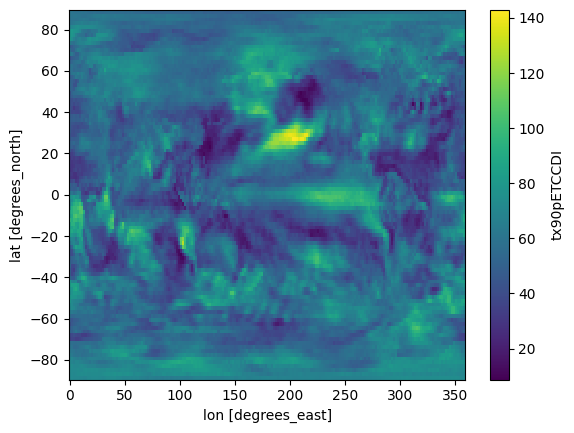

In [20]:
dset.sum(dim="time")["tx90pETCCDI"].plot()

## What happens if the data get's lost?

Let's delete the data:

In [21]:
!rm -fr /scratch/b/b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5

The data is still in the databrowser:

In [22]:
list(freva.databrowser(variable="tx90petccdi"))

['/scratch/b/b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5/cmip5/output1/mpi-m/mpi-esm-lr/historical/yr/atmos/yr/r1i1p1/v20230928/tx90pETCCDI/tx90pETCCDI_yr_mpi-esm-lr_historical_r1i1p1_199007020000-199207011200.nc']

Because of that the data can be re-created:

In [23]:
dset = xr.open_mfdataset(
    freva.databrowser(variable="tx90petccdi",
                      execute_future=True
    )
)
dset

Output()

<xarray.Dataset>
Dimensions:      (time: 3, lon: 192, lat: 96, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 1990-07-02 1991-07-02 1992-07-01T12:00:00
  * lon          (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat          (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) float64 dask.array<chunksize=(3, 2), meta=np.ndarray>
    tx90pETCCDI  (time, lat, lon) float32 dask.array<chunksize=(3, 96, 192), meta=np.ndarray>
Attributes: (12/13)
    CDI:                      Climate Data Interface version 2.0.5 (https://m...
    Conventions:              CF-1.4
    institution:              Max Planck Institute for Meteorology
    ETCCDI_institution:       UNSW Australia & FUB Berlin
    ETCCDI_institution_id:    UNSW-CCRC,FUB-IfM
    ETCCDI_software:          climdex.pcic
    ...                       ...
    contact:                  k204230
    frequency:                yr
    creation_date:            2023-09-28T11:13:07Z
    title:                    ETCCDI indices computed on 0
    history:                  Thu Sep 28 13:14:21 2023: cdo -s setlevel,0 cac...
    CDO:                      Climate Data Operators version 2.0.5 (https://m...

## How can we check if the data is physically present?

Sometimes it might be useful to check if we can use the data straight away or the data has to be re-created.
The databrowser doesn't get informed about the deletion of data automoatically. For example if we delete the data again:

In [24]:
!rm -fr /scratch/b/`b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5

the databrowser still shows the location on disk although the data doesn't exist anymore:

In [25]:
list(freva.databrowser(variable="tx90petccdi"))

['/scratch/b/b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5/cmip5/output1/mpi-m/mpi-esm-lr/historical/yr/atmos/yr/r1i1p1/v20230928/tx90pETCCDI/tx90pETCCDI_yr_mpi-esm-lr_historical_r1i1p1_199007020000-199207011200.nc']

We can use the `check_future` method to check for the existence for futures. Every dataset that doesn't exsit anymore will be deleted from the databrowser and replaced by the special `future://` url, indicating that this dataset doesn't exist but can be recreated. We can use a `key=value` pair search facet like for the databrowser method to sub select only certain datasets:

In [27]:
freva.check_futures(variable="tx90petccdi")

Let's search for the data again:

In [28]:
list(freva.databrowser(variable="tx90petccdi"))

['future:///scratch/b/b380001/futures/6def5135a687932d27f419a3e993b5bd68aa03425ff0378cfb7745c0aef497a5/cmip5/output1/mpi-m/mpi-esm-lr/historical/yr/atmos/1day/r1i1p1/tx90pETCCDI/tx90pETCCDI_1day_mpi-esm-lr_historical_r1i1p1_199007020000-199207011200']